<a href="https://colab.research.google.com/github/aakkkuu/sales_prediction-model/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name- Sales Prediction

Done by- Tejas Kumar

# Problem Statement

The task at hand is to develop a predictive model that accurately forecasts the sales of a big market's various products based on historical sales data and other relevant features. This predictive model aims to assist the market management in making informed decisions regarding inventory management, resource allocation, and strategic planning to optimize sales and enhance overall profitability.

The primary objective of this project is to develop a machine learning model capable of accurately predicting the sales volume of different products within the big market. This predictive model will leverage historical sales data along with other relevant features such as product attributes, store information, promotional activities, and seasonal trends to generate reliable sales forecasts.

Dataset Link : https://drive.google.com/file/d/1EiX0mUvdiwcHhxYwJHVyUHERQynKxr0y/view?usp=sharing

In [ ]:
Github Link :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# Data Collection and analysis
# Loading the dataset
sales_data = pd.read_csv('/content/sales_prediction.csv')

In [ ]:
# Overview of a dataframe
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Number of rows and column
sales_data.shape

(8523, 12)

In [ ]:
# Info about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

Item_Identifier

Item_Fat_Content

Item_Type

Outlet_Identifier

Outlet_Size  

Outlet_Location_Type

Outlet_Type


In [ ]:
# Checking for missing values
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling missing values


In [ ]:
# Calculating the mean for the column 'Item_Weight'
sales_data["Item_Weight"].mean()

12.857645184135976

In [ ]:
# Replacing the missing value of 'Item_Weight' with mean
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace = True)

In [ ]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
mode_value = sales_data['Outlet_Size']. mode()[0]

In [ ]:
# Replacing the mode value of 'Outlet_Size'
sales_data['Outlet_Size'].fillna(mode_value,inplace = True)

In [ ]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Data Analysis

In [ ]:
# Statistical measures about the data
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
sns.set()

<ipython-input-16-7e95abb0ec1c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Weight'])


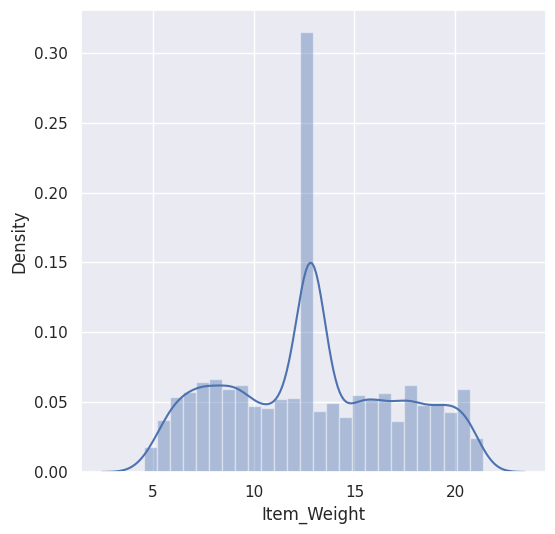

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_Weight'])
plt.show()

<ipython-input-17-33a4b7cf7dc7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Visibility'])


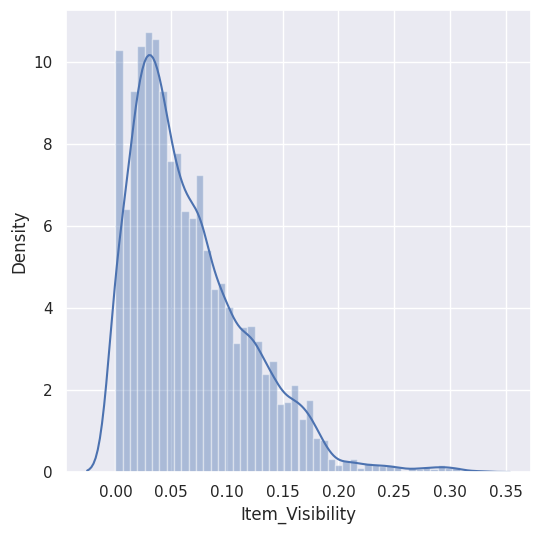

In [ ]:
# Item_Visibilty distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_Visibility'])
plt.show()

<ipython-input-18-1b0ac622931e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_MRP'])


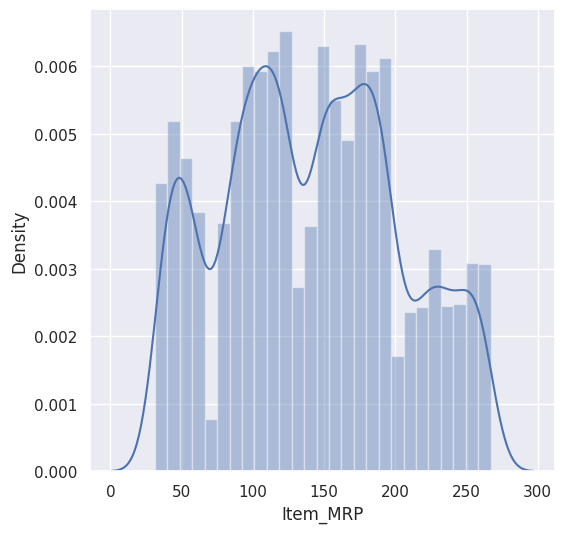

In [ ]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_MRP'])
plt.show()

<ipython-input-19-b63299715b7a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Outlet_Sales'])


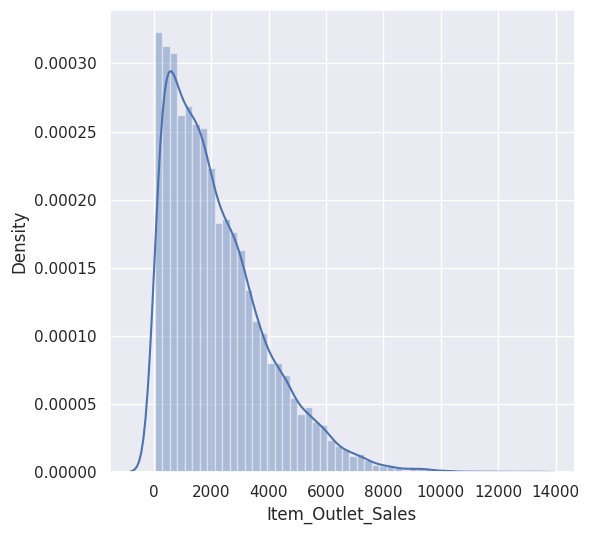

In [ ]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_Outlet_Sales'])
plt.show()

Categorical Feature

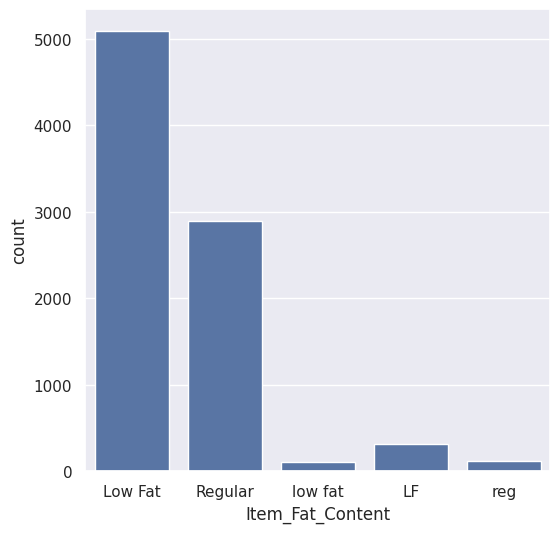

In [ ]:
# Count the Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x ='Item_Fat_Content', data = sales_data )
plt.show()

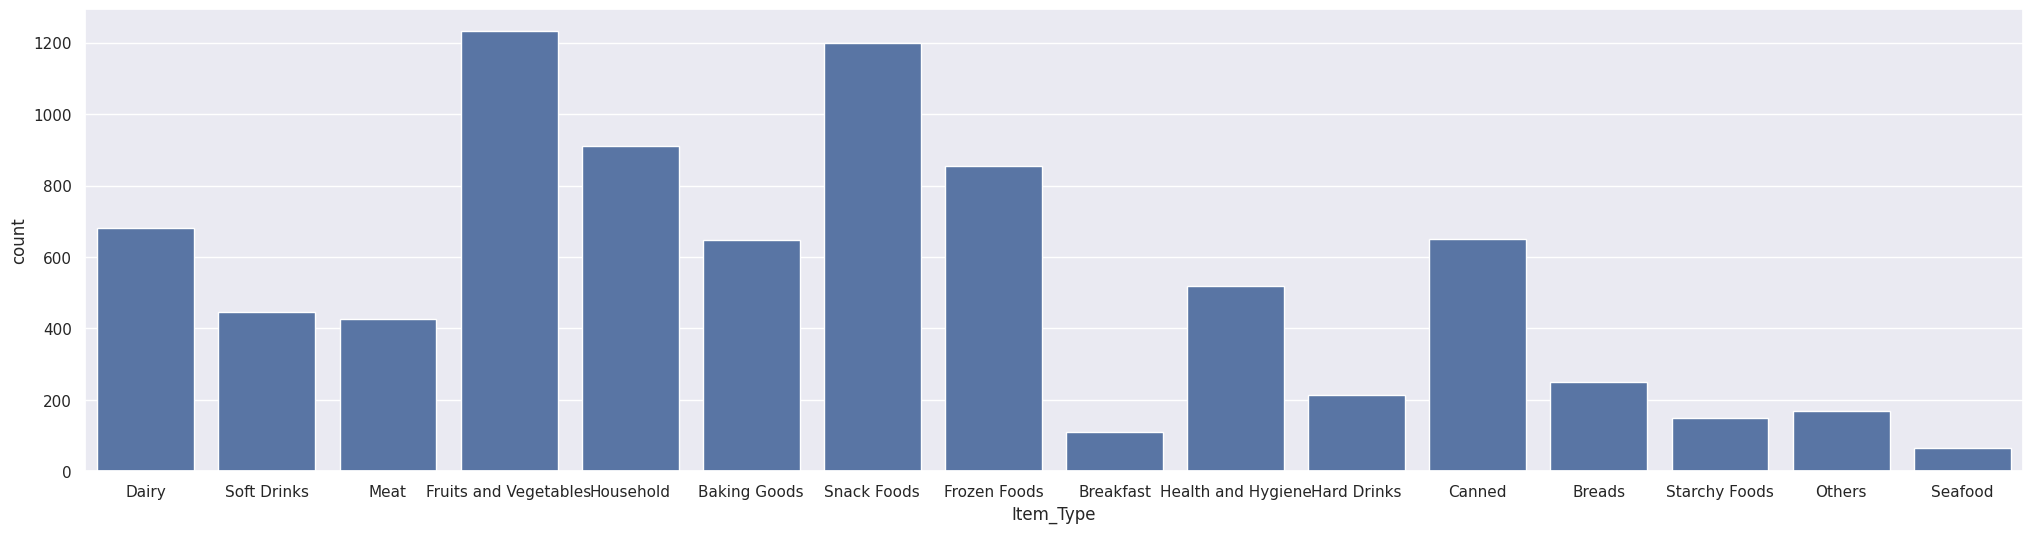

In [ ]:
# Count the Item_Type
plt.figure(figsize=(25,6))
sns.countplot(x ='Item_Type', data = sales_data )
plt.show()

In [ ]:
numerical_variables = sales_data.select_dtypes(include=np.number).columns.tolist()
print(numerical_variables)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


Correlation matrix heatmap

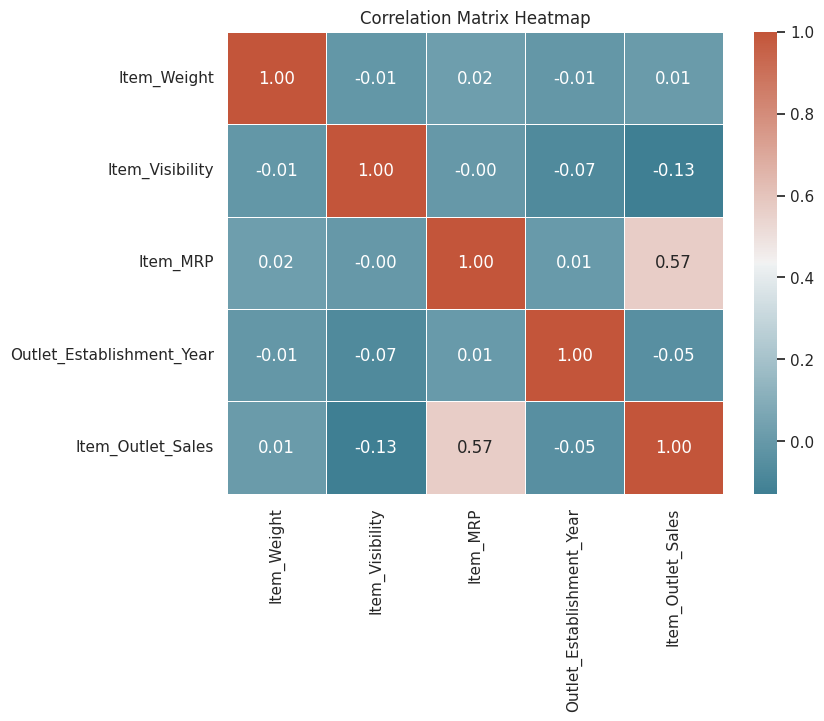

In [ ]:
# Compute correlation matrix
correlation_matrix = sales_data[numerical_variables].corr()

# Create a diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the heatmap with a different style
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Preprocessing Task Before Model Building

1. Label Encoding

In [ ]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Merge the same fat content as one
sales_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace = True)

In [ ]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
encoder = LabelEncoder()

In [ ]:
# List of column to encode
columns_to_encode = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
                     'Outlet_Type', 'Outlet_Size', 'Item_Identifier', 'Outlet_Identifier']

# Perform Label Encoding using for loop
for column in columns_to_encode:
    sales_data[column] = encoder.fit_transform(sales_data[column])

In [ ]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


Spliting the data into train and test

In [ ]:
# Splitting  the feature and target variables
X = sales_data.drop('Item_Outlet_Sales', axis = 1)
Y = sales_data['Item_Outlet_Sales']

In [ ]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [ ]:
# Assinging the 20% of data as test_size
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 42,test_size=0.2)

Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train_std = sc.fit_transform(X_train)

In [ ]:
X_test_std = sc.transform(X_test)

In [ ]:
X_train_std

array([[ 0.71776596, -0.80021083,  1.34421592, ..., -0.28419801,
        -1.38348228, -0.25948864],
       [ 1.20792126,  1.21131742, -0.74392811, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 0.86704053,  1.11665727,  1.34421592, ...,  1.38332526,
        -1.38348228, -0.25948864],
       ...,
       [ 1.52429422,  1.11665727, -0.74392811, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [-0.3806275 ,  1.76744582, -0.74392811, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 1.41289529,  0.82084429, -0.74392811, ...,  1.38332526,
        -1.38348228, -0.25948864]])

In [ ]:
X_test_std

array([[-0.65244089,  0.33571101, -0.74392811, ..., -1.95172128,
         1.08416512, -0.25948864],
       [ 1.36387976, -1.17175193, -0.74392811, ...,  1.38332526,
        -1.38348228, -0.25948864],
       [-1.1938397 ,  0.38304109,  1.34421592, ..., -0.28419801,
        -1.38348228, -0.25948864],
       ...,
       [-1.1938397 ,  0.38304109,  1.34421592, ..., -1.95172128,
         1.08416512, -0.25948864],
       [ 0.88263638, -0.72921571,  1.34421592, ..., -0.28419801,
         1.08416512,  0.9908248 ],
       [-1.17378789, -1.17766819, -0.74392811, ..., -0.28419801,
        -0.14965858, -0.25948864]])

In [ ]:
Y_train

549     2386.2272
7757    3103.9596
764     1125.2020
6867     284.2966
2716    4224.5010
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [ ]:
Y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
7205    3004.0896
3257     890.8404
6346     629.1810
6318     253.0040
6339     976.7286
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

Model building

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [ ]:
Y_pred_lr = lr.predict(X_test_std)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5246461805160536
854.9567883528429
1136.660658424182


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)

In [ ]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
Y_pred_rf = rf.predict(X_test_std)

In [ ]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5629046261690469
757.5451484898534
1089.959697571051


Hyper Parametre Tuning

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define model and parameters
model = RandomForestRegressor()
n_estimators = [10,100,1000]
max_depth = range(1,31)
min_samples_leaf = np.linspace(0.1,1.0)
max_features = ["auto","sqrt","log2"]
min_sample_split = np.linspace(0.1,1.0,10)

# Define the grid search
grid = dict(n_estimators = n_estimators)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                                  scoring='r2',error_score=0,verbose=2,cv=2)
grid_search_forest.fit(X_train_std,Y_train)

# Summarize result
print(f"Best:{grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
  print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best:0.542 using {'n_estimators': 1000}
0.509 (0.005) with: {'n_estimators': 10}
0.538 (0.000) with: {'n_estimators': 100}
0.542 (0.002) with: {'n_estimators': 1000}


In [ ]:
y_pred_rf_grid = grid_search_forest.predict(X_test_std)

In [ ]:
r2_score(Y_test,y_pred_rf_grid)

0.5633371865456411

# Conclusion
Sales Trends and Patterns: EDA revealed various sales trends and patterns, highlighting seasonal variations, promotional effects, and product-specific demand fluctuations. Understanding these trends is crucial for developing accurate sales forecasting models.

Model Performance: Several machine learning regression models were trained and evaluated for sales prediction. Performance metrics such as mean absolute error (MAE), root mean squared error (RMSE), and R-squared were used to assess model accuracy and effectiveness.

Best Performing Model: Among the models tested, [Random ForestRegressor] demonstrated superior performance in terms of predictive accuracy and robustness. This model effectively captured the complex relationships between various features and sales volume, providing reliable forecasts.

In conclusion, the development of a robust sales prediction model provides the big market with a powerful tool for strategic decision-making and performance optimization, ultimately driving sustainable growth and competitive advantage in the retail landscape.







